In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pywaffle import Waffle
import matplotlib.pyplot as plt

import math
import datetime
from datetime import date,datetime
from datetime import timedelta
import re
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import missingno as msno
from pywaffle import Waffle

import warnings
warnings.filterwarnings("ignore")



In [110]:
pip install pywaffle missingno


Note: you may need to restart the kernel to use updated packages.


In [5]:
#Reading the Dataset
xls = pd.ExcelFile('Cardiac_Outcomes.xlsx')
#Reading the Hospitalization_Discharge sheet
df_HD = pd.read_excel(xls, 'Hospitalization_Discharge')
#Reading the CardiacComplications sheet
df_CC = pd.read_excel(xls, 'CardiacComplications')
#Reading the Responsivenes sheet
df_R= pd.read_excel(xls, 'Responsivenes')
#Reading the PatientHistory sheet
df_PH = pd.read_excel(xls, 'PatientHistory')
#Reading the Labs sheet
df_L = pd.read_excel(xls, 'Labs')
#Reading the Demography sheet
df_D = pd.read_excel(xls, 'Demography')
#Reading the Patient_Precriptions sheet
df_PP = pd.read_excel(xls, 'Patient_Precriptions')

# Q1 How many patients were registered in each unique occupation?

In [7]:
df_D.groupby(["occupation"])["inpatient_number"].count()

occupation
Officer             7
Others             89
UrbanResident    1670
farmer            198
worker             17
Name: inpatient_number, dtype: int64

# Q2 Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

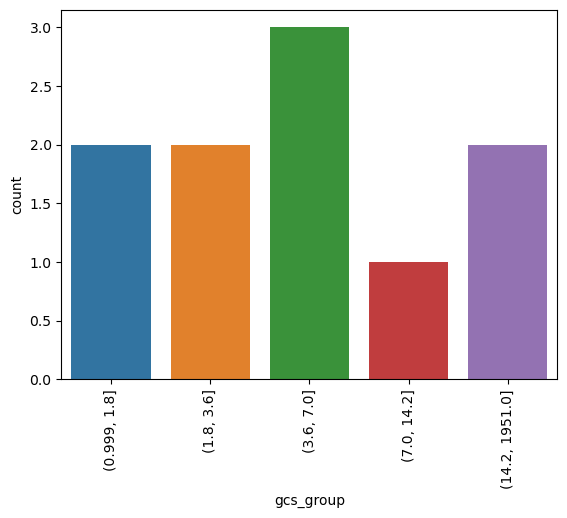

In [70]:
df_gcs = df_R.groupby(['GCS'])['inpatient_number'].count().reset_index()

df_gcs_slab = pd.DataFrame({'gcs_group': pd.qcut(df_gcs['inpatient_number'], 5)})

ax = sns.countplot(data=df_gcs_slab, x='gcs_group')
ax.tick_params(axis='x', labelrotation=90)




# Q3 Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you


In [78]:
df_HD["Discharge_date"] = df_HD["Admission_date"] + pd.to_timedelta(df_HD["dischargeDay"], unit='d')

df_HD.head()

,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months,Discharge_date
0,857781,Home,Cardiology,NonEmergency,Cardiology,1,None,OxygenTherapy,11,2017-01-24,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-02-04
1,743087,Home,Cardiology,NonEmergency,Cardiology,1,None,OxygenTherapy,8,2017-05-05,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-05-13
2,866418,Home,Cardiology,NonEmergency,Cardiology,2,None,OxygenTherapy,5,2016-11-18,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2016-11-23
3,775928,Home,Cardiology,Emergency,Cardiology,1,None,OxygenTherapy,11,2017-10-02,...,1,0,1,0,1,NaN,19.0,1.0,19.0,2017-10-13
4,810128,Home,Cardiology,NonEmergency,Cardiology,1,None,OxygenTherapy,5,2019-11-17,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2019-11-22


# Q4 What percentage of patients had Biventricular heart failure?

In [94]:
df_biventricular = df_CC.loc[df_CC['type_of_heart_failure'] == 'Both']

(df_biventricular['inpatient_number'].count() / df_CC['inpatient_number'].count()) * 100


73.70517928286853

# Q5 What is the ratio of patients who were responsive to pain vs responsive to sound?

In [96]:
df_resp_to_pain = df_R.loc[df_R['consciousness'] == 'ResponsiveToPain']
df_resp_to_sound = df_R.loc[df_R['consciousness'] == 'ResponsiveToSound']

df_resp_to_pain['inpatient_number'].count() / df_resp_to_sound['inpatient_number'].count()

0.21052631578947367

# Q6 What was the average age group of the patients that had an outcome of 'Alive'?

In [107]:
df_merged = df_HD.merge(df_D, on=['inpatient_number'])

df_merged_alive = df_merged.loc[df_merged['outcome_during_hospitalization'] == 'Alive']

df_merged_alive.groupby(['ageCat'])['inpatient_number'].count()


ageCat
21-29       4
29-39      12
39-49      53
49-59     102
59-69     342
69-79     678
79-89     601
89-110     98
Name: inpatient_number, dtype: int64

# Q7 Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

<Axes: >

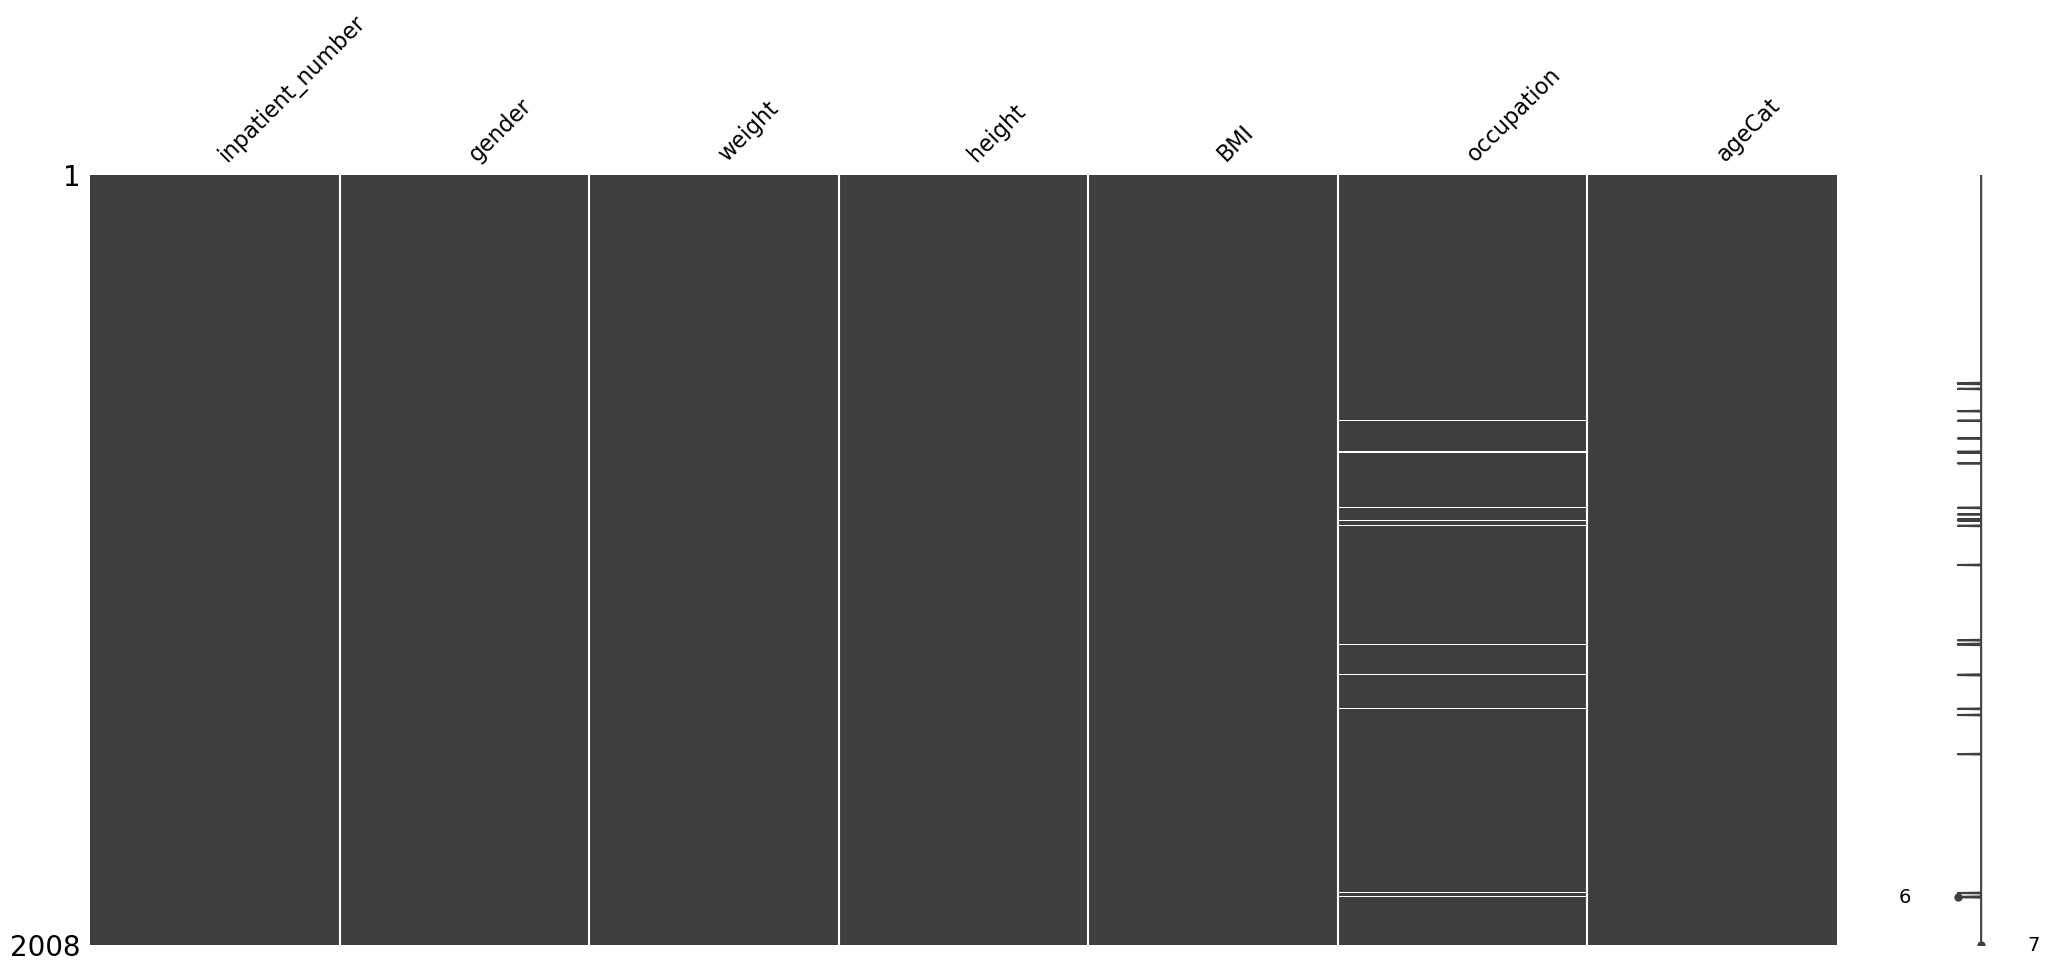

In [117]:
msno.matrix(df_D)

# Q8 Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

admission_ward
Cardiology     73
GeneralWard     9
ICU             9
Others          9
dtype: int64


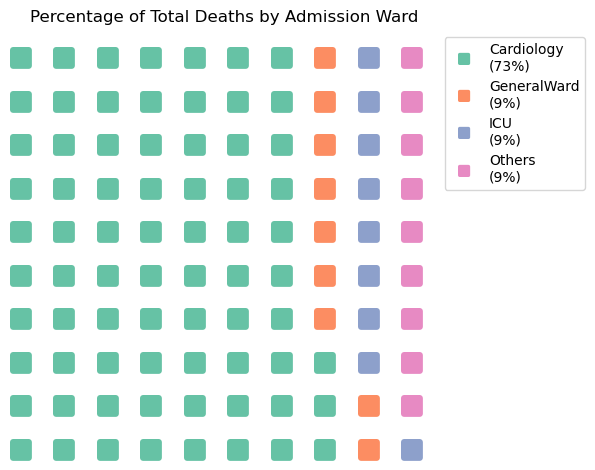

In [265]:
ward_deaths = df_HD[df_HD['outcome_during_hospitalization'] == 'Dead'].groupby('admission_ward').size()
total_deaths = ward_deaths.sum()

death_percentages = (ward_deaths / total_deaths) * 100

ward_death_percentage = death_percentages.round().astype(int)

print(ward_death_percentage)

fig = plt.figure(
    FigureClass=Waffle,
    columns=10,
    values=ward_death_percentage,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    labels=[f"{ward}\n({int(percentage)}%)" for ward, percentage in ward_death_percentage.items()],
    icons='square',
    icon_size=18,
    icon_legend=True
)

plt.title('Percentage of Total Deaths by Admission Ward')
plt.show()

# Q9 Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [216]:
array1 = pd.DataFrame([[1, 2], [3, 4]])
array2 = pd.DataFrame([[5, 6], [7, 8]])

array1.dot(array2)


,0,1
0,19,22
1,43,50



# Q 10Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph

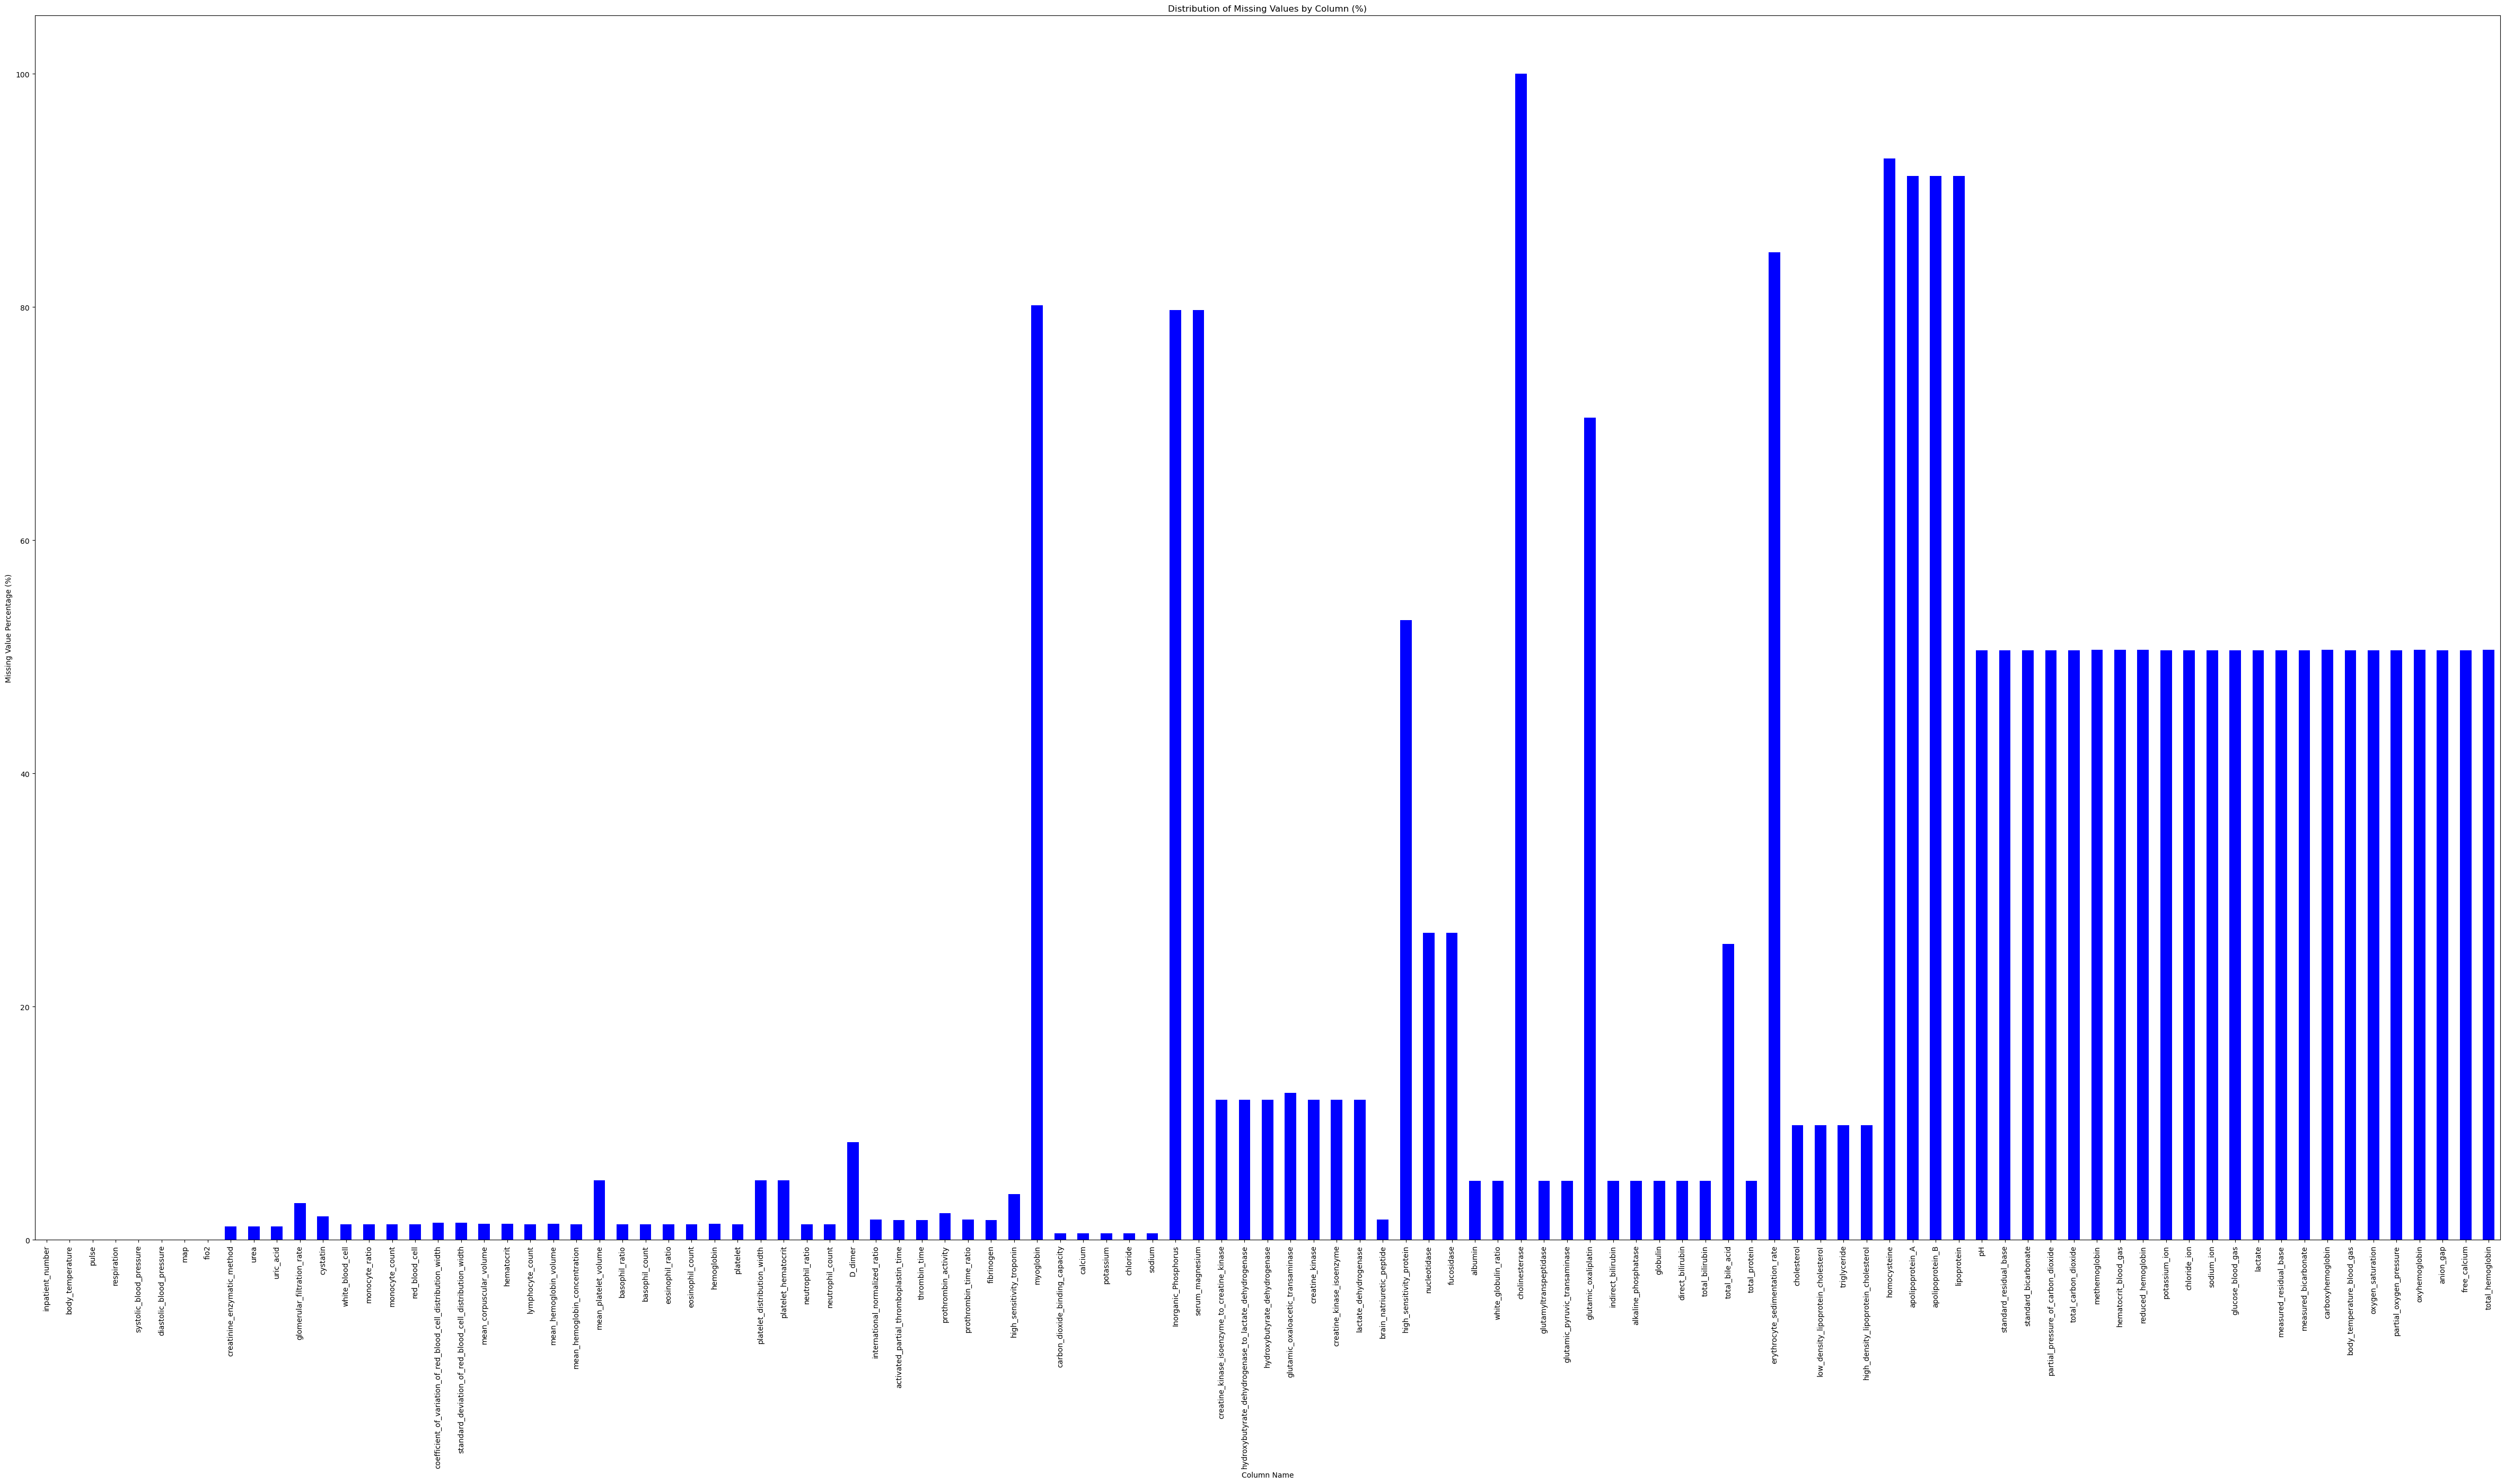

In [228]:
missing_values_percentage = (df_L.isna().sum() / len(df_L)) * 100
#print(missing_values_percentage.to_string())
plt.figure(figsize=(60, 30))
missing_values_percentage.plot(kind='bar', color='blue')
plt.title("Distribution of Missing Values by Column (%)")
plt.xlabel("Column Name")
plt.ylabel("Missing Value Percentage (%)")
plt.xticks(rotation=90)
plt.show()


# Q11 A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.


In [267]:
if len(mobile_number) == 10 and mobile_number.startswith("7") or mobile_number.startswith("8") or mobile_number.startswith("9"):
    return "YES"
  else:
    return "NO"

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

# Q12 If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [232]:
df_abnormal_LVEDD = df_CC[(df_CC['left_ventricular_end_diastolic_diameter_LV'] < 3.5) | (df_CC['left_ventricular_end_diastolic_diameter_LV'] > 5.6)]
df_merged = df_abnormal_LVEDD.merge(df_L, on=['inpatient_number'])

abnormal_LVEDD_count = df_abnormal_LVEDD.shape[0]
most_common_map = df_merged['map'].mode()[0]

print("Number of patients with LVEDD outside the normal range:", abnormal_LVEDD_count)
print("Most common MAP of patients with this condition:", most_common_map)

Number of patients with LVEDD outside the normal range: 1311
Most common MAP of patients with this condition: 96.6666666666667


# Q13Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

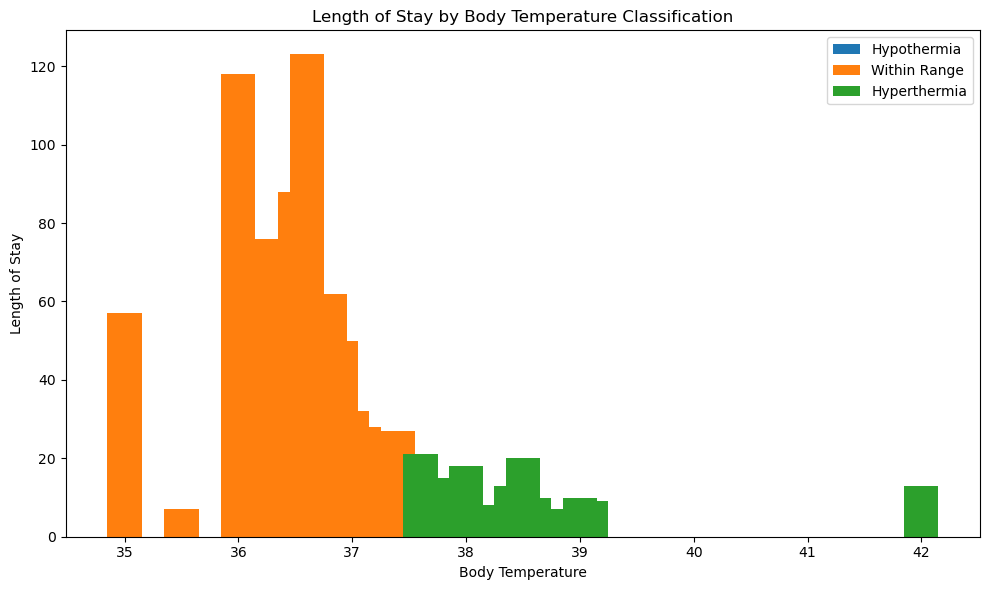

In [237]:
df_merged = df_HD.merge(df_L, on=['inpatient_number'])
hypothermia = df_merged[df_merged['body_temperature'] < 35]
within_range = df_merged[(df_merged['body_temperature'] >= 35) & (df_merged['body_temperature'] <= 37.5)]
hyperthermia = df_merged[df_merged['body_temperature'] > 37.5]

plt.figure(figsize=(10, 6))
plt.bar(hypothermia['body_temperature'], hypothermia['dischargeDay'], label='Hypothermia', width=0.3)
plt.bar(within_range['body_temperature'], within_range['dischargeDay'], label='Within Range', width=0.3)
plt.bar(hyperthermia['body_temperature'], hyperthermia['dischargeDay'], label='Hyperthermia', width=0.3)
plt.xlabel('Body Temperature')
plt.ylabel('Length of Stay')
plt.title('Length of Stay by Body Temperature Classification')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

# Q14 Find the list of patients whose DischargeDay is greater than the value given by the user

In [241]:
user_number = input("Enter A number: ")
user_number = int(user_number)
df_custom = df_HD.loc[df_HD['dischargeDay'] > user_number]

print (df_custom)

Enter A number: 50
      inpatient_number DestinationDischarge admission_ward admission_way  \
183             775922                 Home         Others     Emergency   
442             759764                 Home     Cardiology  NonEmergency   
470             811749                 Died     Cardiology  NonEmergency   
484             770068                 Home     Cardiology  NonEmergency   
579             782110                 Home     Cardiology  NonEmergency   
811             737251                 Home     Cardiology  NonEmergency   
884             794077                 Home    GeneralWard     Emergency   
1345            744531                 Home     Cardiology  NonEmergency   
1511            836855                 Home     Cardiology  NonEmergency   
1513            757711                 Home    GeneralWard  NonEmergency   
1548            791880                 Home    GeneralWard  NonEmergency   
1573            794784                 Home     Cardiology  NonEmerge

# Q15 Display a pie chart of number of patients in each category listed

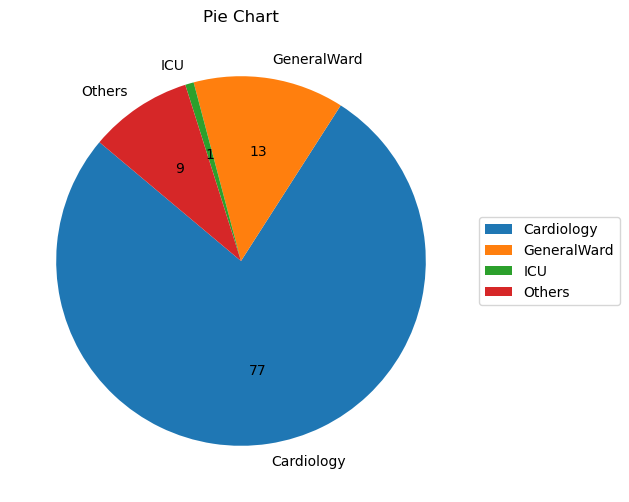

In [215]:
plt.figure(figsize=(8, 6))

patient_count = df_HD.groupby(['admission_ward'])["inpatient_number"].count()

plt.pie(patient_count, labels=patient_count.index, autopct='%1.0f', startangle=140)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Pie Chart')
plt.show()




# Q16 Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions